In [25]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import pystan

In [26]:
data = np.array(pd.read_csv("fukushima_wind.csv"))[2:]

In [27]:
wind = np.sqrt(data[:,1]**2+data[:,0]**2)

In [28]:
wind_ = wind[:100]

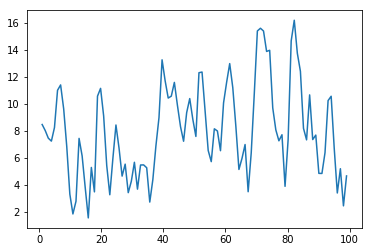

In [29]:
plt.plot(np.linspace(1,99,100) , wind_)
plt.show()

In [34]:
model = """
    data {
        int n; # サンプルサイズ
        vector[n] y; # 時系列の値
    }
    parameters {
        vector[n] mu; # 確率的レベル
        real<lower=0> sigmaV; # 観測誤差の大きさ
        real<lower=0> sigmaW; # 過程誤差の大きさ
    }
    model {
        # 状態方程式
        mu[1] ~ normal(8.469052578264556, sqrt(sigmaW));
        for(i in 2:n) {
            mu[i] ~ normal(mu[i-1], sqrt(sigmaW));
        }
        
        # 観測方程式
        for(i in 1:n) {
            if(i %2 ==0){
                y[i] ~ normal(mu[i], sqrt(sigmaV));
            }
        }
    }
"""

In [35]:
fit = pystan.stan(model_code=model, data={'n': 100, 'y': wind_}, iter=1000, chains=1)
fit

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dd0e3b5fc5263afb624d0d9ae20ebc6f NOW.



For the full summary use 'print(fit)'

Inference for Stan model: anon_model_dd0e3b5fc5263afb624d0d9ae20ebc6f.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]    8.38    0.05    1.1   6.04   7.81    8.4    9.0  10.48    484    1.0
mu[2]    8.21    0.04   1.12   6.05   7.57   8.25   8.88  10.59    666    1.0
mu[3]    8.11    0.06   1.47   5.17   7.27   8.11   8.94  11.33    690    1.0
mu[4]    7.95    0.05   1.32   5.31   7.07   7.92   8.79  10.78    649    1.0
mu[5]    8.18     0.1   1.56    5.2   7.22   8.14   9.12  11.43    252   1.02
mu[6]    8.36    0.16   1.52   5.43   7.32    8.3   9.37   11.3     95   1.05
mu[7]    7.92    0.13   1.67   4.89   6.92    7.8   8.98   11.4    166   1.03
mu[8]    7.52    0.11   1.49   4.51   6.62   7.54   8.55  10.51    185   1.02
mu[9]    6.65    0.08   1.51   3.53   5.67   6.71   7.61   9.33    329  

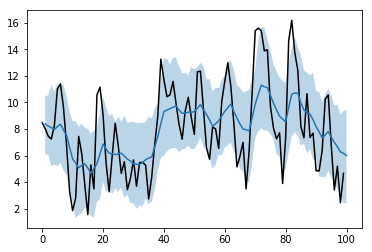

In [36]:
la = fit.extract()
 
pred = la['mu'].mean(axis=0)
mu_lower, mu_upper = np.percentile(la['mu'], q=[2.5, 97.5], axis=0)
 
plt.plot(list(range(len(wind_)+1)), list(wind_)+[None], color='black')
plt.plot(list(range(1, len(wind_)+1)), pred)
plt.fill_between(list(range(1, len(wind_)+1)), mu_lower, mu_upper, alpha=0.3)
plt.show()

In [43]:
la['mu'].shape

(500, 100)